In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect("database.sqlite")

tables = ['Country', 'League', 'Match', 'Player', 'Player_Attributes', 'Team', 'Team_Attributes']

df_country = pd.read_sql_query("SELECT * FROM Country", conn)
df_league = pd.read_sql_query("SELECT * FROM League", conn)
df_match = pd.read_sql_query("SELECT * FROM Match", conn)
df_player = pd.read_sql_query("SELECT * FROM Player", conn)
df_player_attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
df_team = pd.read_sql_query("SELECT * FROM Team", conn)
df_team_attributes = pd.read_sql_query("SELECT * FROM Team_Attributes", conn)

conn.close()
df_team_attributes
df_match

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [24]:
merged_df = pd.merge(df_team, df_match, left_on='team_api_id', right_on='home_team_api_id', how='inner')

final_df = pd.merge(merged_df, df_league, left_on='league_id', right_on='id', how='inner')

df_team_league_country = final_df[['team_long_name', 'team_api_id', 'name', 'id_x', 'country_id_y']].drop_duplicates()

df_team_league_country.columns = ['team_name', 'team_api_id', 'league_name', 'league_id', 'country_id']

df_team_league_country = pd.merge(df_team_league_country, df_country, left_on='country_id', right_on='id', how='left')

df_team_league_country = df_team_league_country[['team_name', 'team_api_id', 'league_name', 'league_id', 'name', 'country_id']]
df_team_league_country.columns = ['team_name', 'team_api_id', 'league_name', 'league_id', 'country_name', 'country_id']

df_team_league_country = df_team_league_country.sort_values(['country_name', 'league_name', 'team_name'])

df_team_league_country.to_csv('team_league_country_with_ids.csv', index=False)

print(df_team_league_country.head())

         team_name  team_api_id             league_name  league_id  \
1     Beerschot AC         9993  Belgium Jupiler League          2   
11  Club Brugge KV         8342  Belgium Jupiler League         12   
8    FCV Dender EH         7947  Belgium Jupiler League          9   
6         KAA Gent         9991  Belgium Jupiler League          7   
20       KAS Eupen         6351  Belgium Jupiler League       1042   

   country_name  country_id  
1       Belgium           1  
11      Belgium           1  
8       Belgium           1  
6       Belgium           1  
20      Belgium           1  


In [25]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [26]:
df_team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [27]:
print(df_team_attributes.columns)
df_team.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')


Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')

In [28]:
teams = pd.merge(df_team_attributes,df_team, on='team_fifa_api_id', how='inner')  # Inner join
teams.head()

,id_x,team_fifa_api_id,team_api_id_x,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,id_y,team_api_id_y,team_long_name,team_short_name
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,Medium,55,Press,45,Normal,Cover,49119,9930,FC Aarau,AAR
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,Medium,44,Press,54,Normal,Cover,49119,9930,FC Aarau,AAR
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,Medium,44,Press,54,Normal,Cover,49119,9930,FC Aarau,AAR
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,Medium,70,Double,70,Wide,Cover,39393,8485,Aberdeen,ABE
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,Medium,47,Press,52,Normal,Cover,39393,8485,Aberdeen,ABE


In [29]:
print(teams.shape)
teams = pd.merge(teams, df_team_league_country, 
                     left_on='team_api_id_x', 
                     right_on='team_api_id', 
                     how='left')
teams.head()
print(teams.shape)

#

(1473, 29)
(1473, 35)


In [30]:
teams.columns

Index(['id_x', 'team_fifa_api_id', 'team_api_id_x', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass',
       'id_y', 'team_api_id_y', 'team_long_name', 'team_short_name',
       'team_name', 'team_api_id', 'league_name', 'league_id', 'country_name',
       'country_id'],
      dtype='object')

In [31]:
import pandas as pd

print(teams.shape)
teams = teams[teams['country_id'].isin([1729,4769,7809,10257,21518])]
print(teams.shape)

teams['date'] = pd.to_datetime(teams['date'])

def get_filter_year():
    year = pd.to_datetime('2015-01-01')
    return year

def aggregate_numeric(x):
    return x.mean()

def aggregate_categorical(x):
    return x.mode().iloc[0]

filter_year = get_filter_year()

filtered_players = teams[teams['date'] >= filter_year]

numeric_columns = filtered_players.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = filtered_players.select_dtypes(include=['object']).columns

columns_to_aggregate = [col for col in filtered_players.columns if col not in ['date', 'year']]

aggregated_players = filtered_players.groupby('team_fifa_api_id').agg({
    **{col: aggregate_numeric for col in numeric_columns if col in columns_to_aggregate},
    **{col: aggregate_categorical for col in categorical_columns if col in columns_to_aggregate}
})

print(f"Filtered and aggregated data for players from {filter_year} onwards:")
print(aggregated_players.head())
print(f"\nShape of the aggregated data: {aggregated_players.shape}")
teams = aggregated_players
teams.head()


(1473, 35)
(924, 35)
Filtered and aggregated data for players from 2015-01-01 00:00:00 onwards:
                   id_x  team_fifa_api_id  team_api_id_x  buildUpPlaySpeed  \
team_fifa_api_id                                                             
1                  76.0               1.0         9825.0              59.0   
2                  82.0               2.0        10252.0              63.0   
3                 178.0               3.0         8655.0              60.0   
4                 203.0               4.0         8559.0              57.0   
5                 312.0               5.0         8455.0              67.0   

                  buildUpPlayDribbling  buildUpPlayPassing  \
team_fifa_api_id                                             
1                                 51.0                30.0   
2                                 37.0                54.0   
3                                 60.0                65.0   
4                                 34.0         

In [19]:
teams.columns

Index(['id_x', 'team_fifa_api_id', 'team_api_id_x', 'buildUpPlaySpeed',
       'buildUpPlayDribbling', 'buildUpPlayPassing', 'chanceCreationPassing',
       'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure',
       'defenceAggression', 'defenceTeamWidth', 'id_y', 'team_api_id_y',
       'team_api_id', 'league_id', 'country_id', 'buildUpPlaySpeedClass',
       'buildUpPlayDribblingClass', 'buildUpPlayPassingClass',
       'buildUpPlayPositioningClass', 'chanceCreationPassingClass',
       'chanceCreationCrossingClass', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressureClass',
       'defenceAggressionClass', 'defenceTeamWidthClass',
       'defenceDefenderLineClass', 'team_long_name', 'team_short_name',
       'team_name', 'league_name', 'country_name'],
      dtype='object')

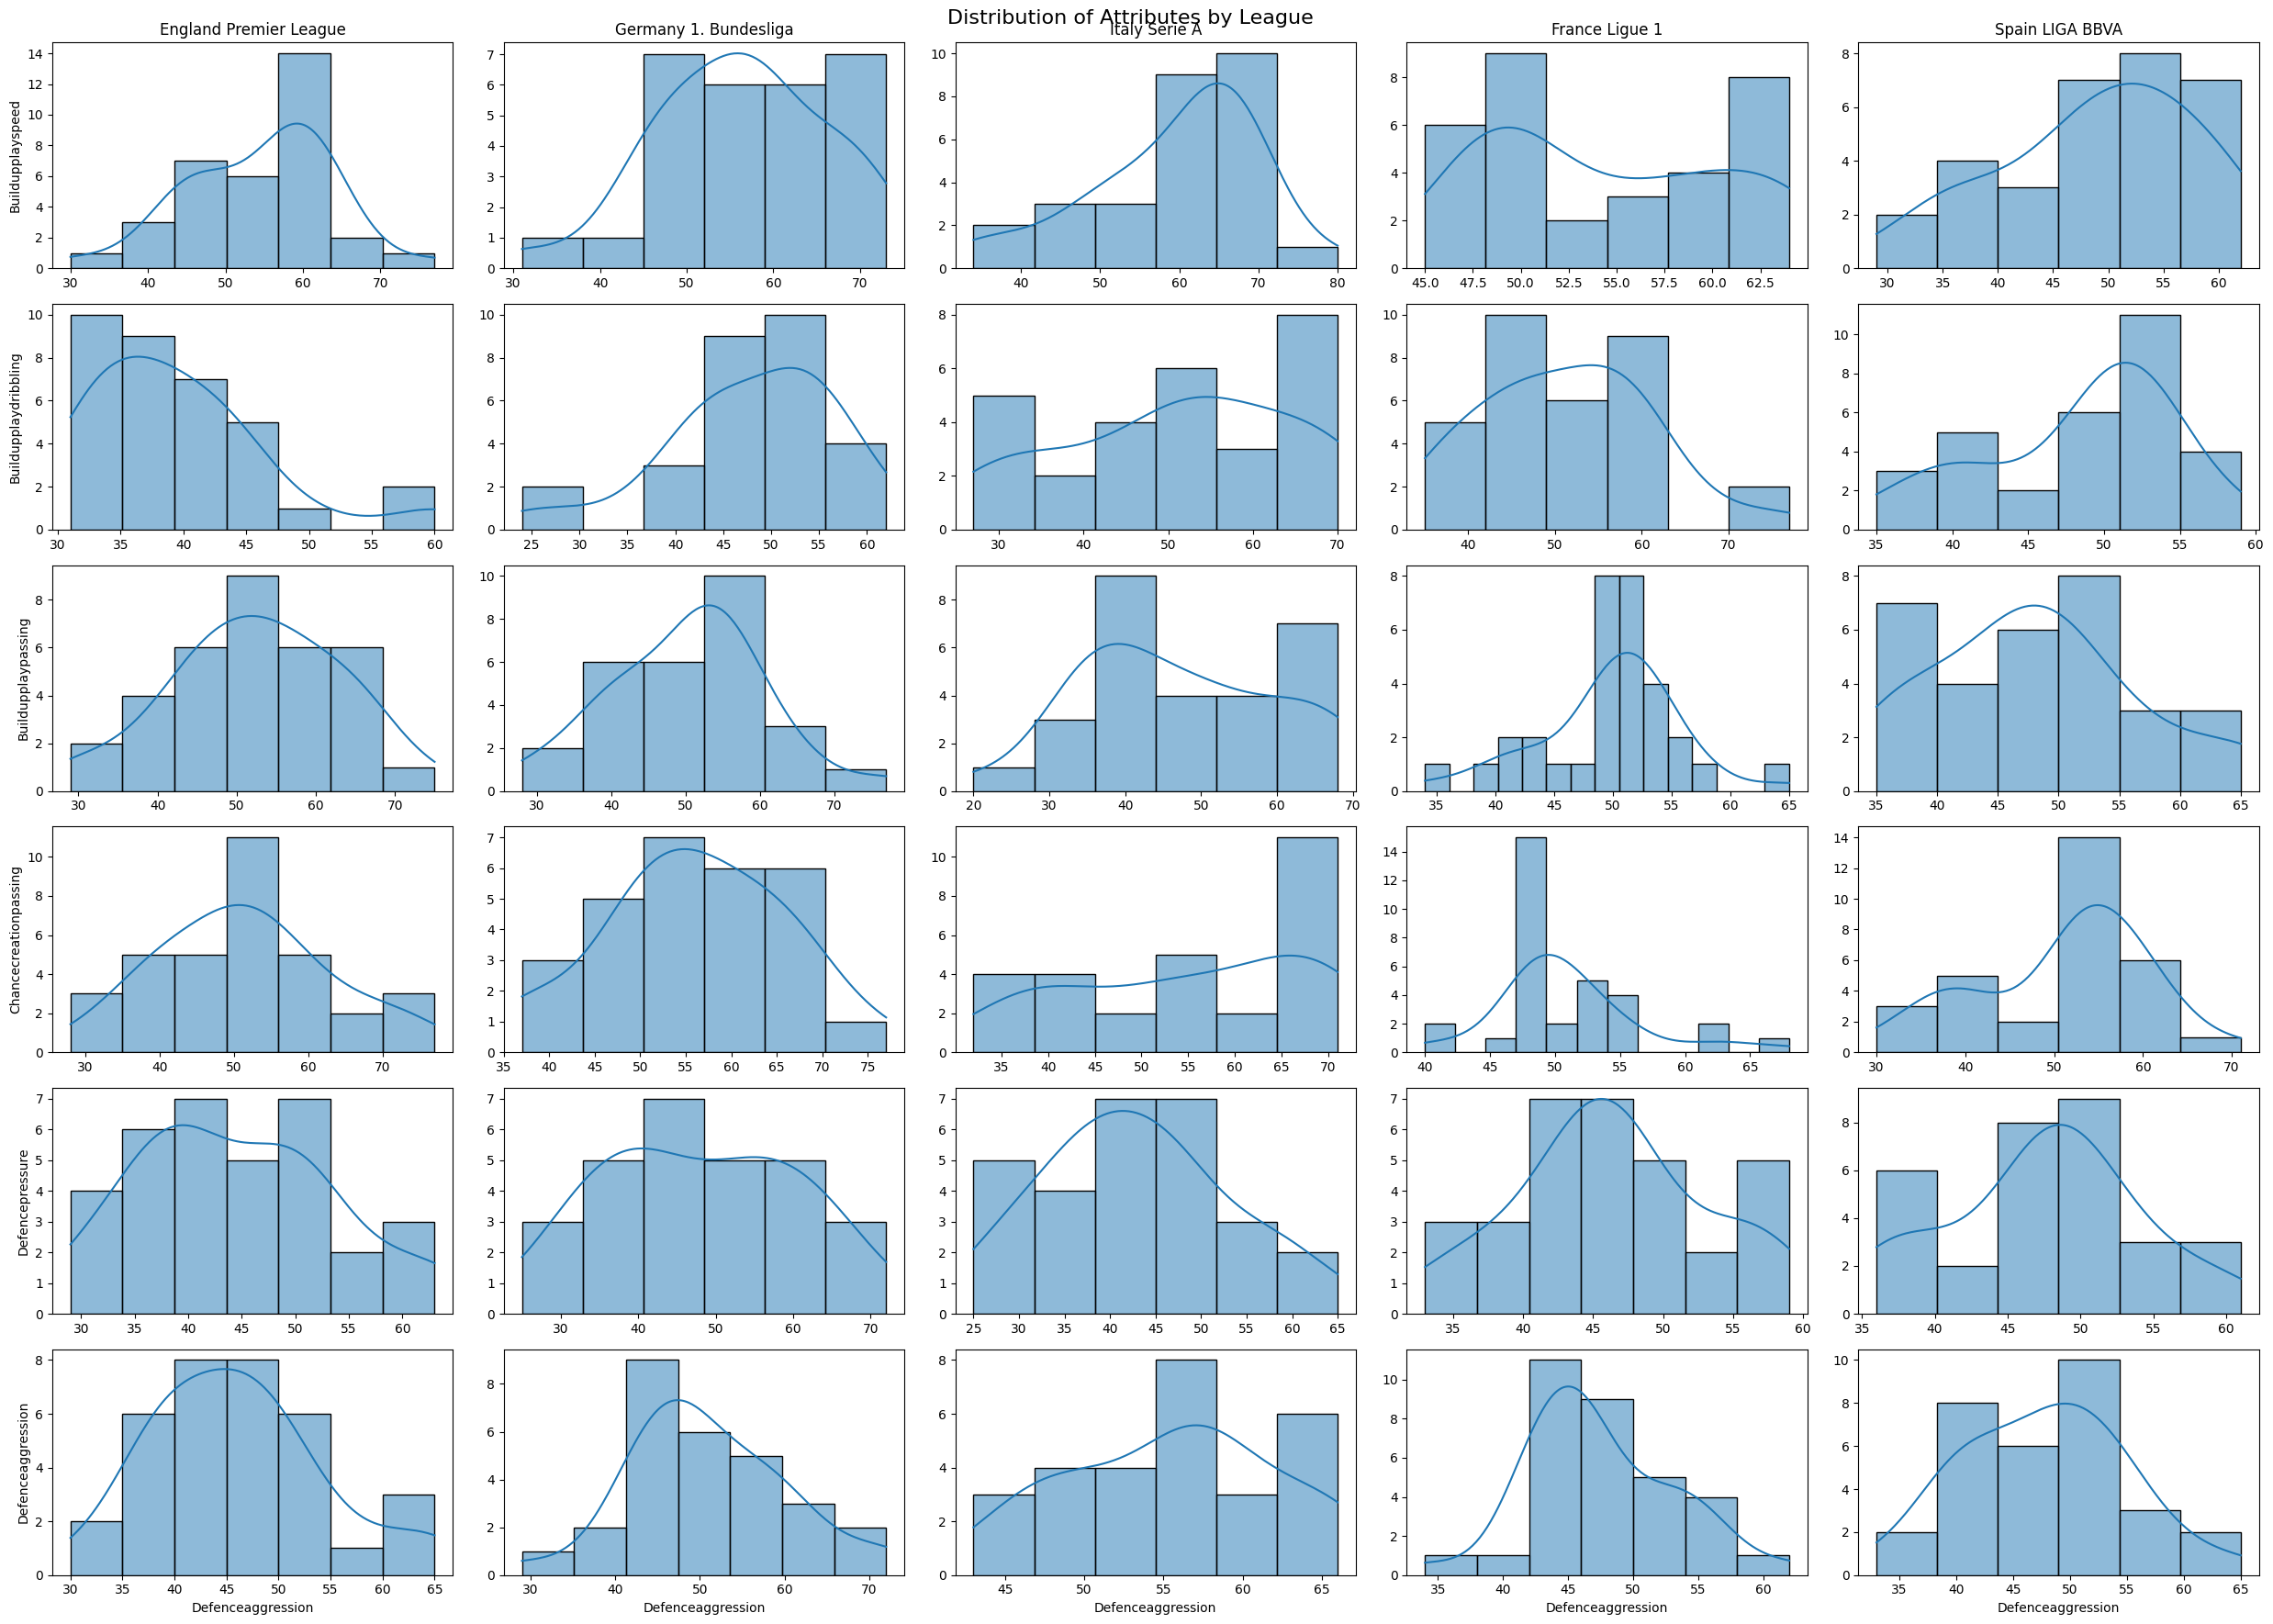

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

attributes = ['buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing', 
              'chanceCreationPassing', 
              'defencePressure', 'defenceAggression']

leagues = teams['league_name'].unique()

fig, axs = plt.subplots(len(attributes), len(leagues), figsize=(5*len(leagues), 3*len(attributes)))
fig.suptitle('Distribution of Attributes by League', fontsize=16)

for i, attr in enumerate(attributes):
    for j, league in enumerate(leagues):
        league_data = teams[teams['league_name'] == league]
        
        if pd.api.types.is_numeric_dtype(teams[attr]):
            sns.histplot(league_data[attr], kde=True, ax=axs[i, j])
        else:
            sns.countplot(x=attr, data=league_data, ax=axs[i, j])
            axs[i, j].tick_params(axis='x', rotation=90)
        
        if i == 0:
            axs[i, j].set_title(league)
        if j == 0:
            axs[i, j].set_ylabel(attr.replace('_', ' ').title())
        else:
            axs[i, j].set_ylabel('')
        
        if i < len(attributes) - 1:
            axs[i, j].set_xlabel('')
        else:
            axs[i, j].set_xlabel(attr.replace('_', ' ').title())

plt.tight_layout()
plt.show()